In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
job=pd.read_csv("C:/Users/gaura/OneDrive/Desktop/Data Science/Assignments/6. Analyzing online Job Postings/data job posts.csv")

In [3]:
job.head()

,jobpost,date,Title,Company,AnnouncementCode,Term,Eligibility,Audience,StartDate,Duration,...,Salary,ApplicationP,OpeningDate,Deadline,Notes,AboutC,Attach,Year,Month,IT
0,AMERIA Investment Consulting Company\nJOB TITL...,"Jan 5, 2004",Chief Financial Officer,AMERIA Investment Consulting Company,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,"To apply for this position, please submit a\nc...",NaN,26 January 2004,NaN,NaN,NaN,2004,1,False
1,International Research & Exchanges Board (IREX...,"Jan 7, 2004",Full-time Community Connections Intern (paid i...,International Research & Exchanges Board (IREX),NaN,NaN,NaN,NaN,NaN,3 months,...,NaN,Please submit a cover letter and resume to:\nI...,NaN,12 January 2004,NaN,The International Research & Exchanges Board (...,NaN,2004,1,False
2,Caucasus Environmental NGO Network (CENN)\nJOB...,"Jan 7, 2004",Country Coordinator,Caucasus Environmental NGO Network (CENN),NaN,NaN,NaN,NaN,NaN,Renewable annual contract\nPOSITION,...,NaN,Please send resume or CV toursula.kazarian@......,NaN,20 January 2004\nSTART DATE: February 2004,NaN,The Caucasus Environmental NGO Network is a\nn...,NaN,2004,1,False
3,Manoff Group\nJOB TITLE: BCC Specialist\nPOSI...,"Jan 7, 2004",BCC Specialist,Manoff Group,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Please send cover letter and resume to Amy\nPe...,NaN,23 January 2004\nSTART DATE: Immediate,NaN,NaN,NaN,2004,1,False
4,Yerevan Brandy Company\nJOB TITLE: Software D...,"Jan 10, 2004",Software Developer,Yerevan Brandy Company,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Successful candidates should submit\n- CV; \n-...,NaN,"20 January 2004, 18:00",NaN,NaN,NaN,2004,1,True


In [4]:
job.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19001 entries, 0 to 19000
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   jobpost           19001 non-null  object
 1   date              19001 non-null  object
 2   Title             18973 non-null  object
 3   Company           18994 non-null  object
 4   AnnouncementCode  1208 non-null   object
 5   Term              7676 non-null   object
 6   Eligibility       4930 non-null   object
 7   Audience          640 non-null    object
 8   StartDate         9675 non-null   object
 9   Duration          10798 non-null  object
 10  Location          18969 non-null  object
 11  JobDescription    15109 non-null  object
 12  JobRequirment     16479 non-null  object
 13  RequiredQual      18517 non-null  object
 14  Salary            9622 non-null   object
 15  ApplicationP      18941 non-null  object
 16  OpeningDate       18295 non-null  object
 17  Deadline    

In [5]:
job.columns

Index(['jobpost', 'date', 'Title', 'Company', 'AnnouncementCode', 'Term',
       'Eligibility', 'Audience', 'StartDate', 'Duration', 'Location',
       'JobDescription', 'JobRequirment', 'RequiredQual', 'Salary',
       'ApplicationP', 'OpeningDate', 'Deadline', 'Notes', 'AboutC', 'Attach',
       'Year', 'Month', 'IT'],
      dtype='object')

In [6]:
# Useful columns from datasets
job_post=job[['jobpost', 'Title', 'Company','JobDescription', 'JobRequirment', 'RequiredQual','AboutC','Year', 'Month', 'IT']]

In [7]:
job_post.isnull().sum()

jobpost              0
Title               28
Company              7
JobDescription    3892
JobRequirment     2522
RequiredQual       484
AboutC            6531
Year                 0
Month                0
IT                   0
dtype: int64

In [8]:
# Number of job posts by titles
classes = job_post['Title'].value_counts()[:21]
keys = classes.keys().to_list()

In [9]:
job_post = job_post[job_post['Title'].isin(keys)]
job_post['Title'].value_counts()

Accountant                                328
Chief Accountant                          219
Medical Representative                    216
Sales Manager                             166
Administrative Assistant                  155
Lawyer                                    151
Software Developer                        134
Project Manager                           117
English Language Courses                  109
Web Developer                             101
Java Developer                             88
Marketing Specialist                       87
Office Manager                             85
Receptionist/ Administrative Assistant     77
Graphic Designer                           75
System Administrator                       75
Marketing Manager                          72
Senior Java Developer                      69
Software Engineer                          69
QA Engineer                                66
PHP Developer                              65
Name: Title, dtype: int64

#### Job Posting by Year

In [10]:
y=pd.DataFrame(job_post.Year.value_counts().reset_index())
y['Job Posts']=y.Year
y['Year']=y['index']
y.drop('index',axis=1,inplace=True)
y.sort_values(by='Year',inplace=True)
y

,Year,Job Posts
11,2004,83
10,2005,154
8,2006,173
5,2007,229
4,2008,242
9,2009,163
7,2010,205
6,2011,214
2,2012,265
1,2013,267


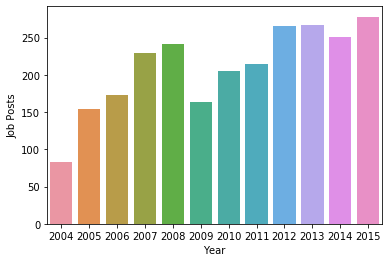

In [11]:
import seaborn as sns
sns.barplot(x='Year',y='Job Posts',data=y)
plt.show()

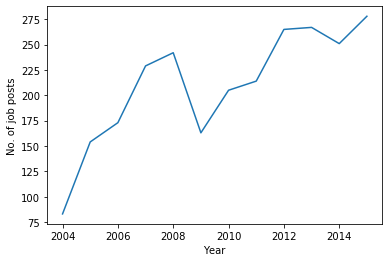

In [12]:
plt.plot('Year','Job Posts',data=y)
plt.xlabel('Year')
plt.ylabel('No. of job posts')
plt.show()

#### Job Posting by month

In [13]:
m=pd.DataFrame(job_post.Month.value_counts().reset_index())
m['Job Posts']=m.Month
m['Month']=m['index']
m.drop('index',axis=1,inplace=True)
m.sort_values(by='Month',inplace=True)
m

,Month,Job Posts
9,1,200
1,2,226
3,3,224
10,4,198
6,5,208
5,6,209
4,7,212
7,8,208
0,9,226
2,10,225


#### Job Post by Company

In [14]:
c=pd.DataFrame(job_post.Company.value_counts().reset_index())
c['Job Posts']=c.Company
c['Company']=c['index']
c.drop('index',axis=1,inplace=True)
c.sort_values(by='Job Posts',inplace=True,ascending=False)
c.head(10)

,Company,Job Posts
0,Career Center NGO,178
1,SAS Group LLC,25
2,Virtual Solution Global Services LLC,23
3,Boomerang Software LLC,21
4,IUNetworks LLC,17
5,ArmenTel CJSC,16
6,Joomag AM LLC,15
7,Energize Global Services CJSC,14
8,Sourcio CJSC,14
9,BetArchitect LLC,14


#### Job Post by Year

In [15]:
y=pd.DataFrame(job_post.Year.value_counts().reset_index())
y['Title']=y.Year
y['Year']=y['index']
y.drop('index',axis=1,inplace=True)
y.sort_values(by='Year',inplace=True)
y

,Year,Title
11,2004,83
10,2005,154
8,2006,173
5,2007,229
4,2008,242
9,2009,163
7,2010,205
6,2011,214
2,2012,265
1,2013,267


In [16]:
df=job_post[['RequiredQual','IT']]

#### Exploratory Analysis

In [17]:
df['RequiredQual'] = df['RequiredQual'].astype(str)

pos_family = {
    'noun' : ['NN','NNS','NNP','NNPS'],
    'pron' : ['PRP','PRP$','WP','WP$'],
    'verb' : ['VB','VBD','VBG','VBN','VBP','VBZ'],
    'adj' :  ['JJ','JJR','JJS'],
    'adv' : ['RB','RBR','RBS','WRB']
}

# function to check and get the part of speech tag count of a words in a given sentence
def check_pos_tag(x, flag):
    cnt = 0
    try:
        wiki = textblob.TextBlob(x)
        for tup in wiki.tags:
            ppo = list(tup)[1]
            if ppo in pos_family[flag]:
                cnt += 1
    except:
        pass
    return cnt

df['noun_count'] = df['RequiredQual'].apply(lambda x: check_pos_tag(x, 'noun'))
df['verb_count'] = df['RequiredQual'].apply(lambda x: check_pos_tag(x, 'verb'))
df['adj_count']  = df['RequiredQual'].apply(lambda x: check_pos_tag(x, 'adj'))
df['adv_count']  = df['RequiredQual'].apply(lambda x: check_pos_tag(x, 'adv'))
df['pron_count'] = df['RequiredQual'].apply(lambda x: check_pos_tag(x, 'pron'))

C:\Users\gaura\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\gaura\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\gaura\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

#### Sentiment analysis

In [18]:
from textblob import TextBlob
df['sentiment'] = df["RequiredQual"].apply(lambda x: TextBlob(x).sentiment.polarity )

C:\Users\gaura\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [19]:
df.IT.value_counts()

False    1923
True      601
Name: IT, dtype: int64

In [20]:
y = df['IT']
X = df['RequiredQual']

#### Data Preprocessing

In [21]:
#Abbrevations and Words correction
import re
def clean_text(text):
    text = text.lower()
    text = text.strip()
    text = re.sub(r' +', ' ', text)
    text = re.sub(r"[-()\"#/@;:{}`+=~|.!?,'0-9]", "", text)
    return(text)

In [22]:
import nltk
stop = set(nltk.corpus.stopwords.words('english'))

In [23]:
import string
def pre_process(text):
    text = text.apply(lambda x: re.sub("  "," ", x))          #Replacing double space with single space
    text = text.apply(lambda x: " ".join(x.translate(str.maketrans('', '', string.punctuation)) for x in x.split() if x.isalpha()))
    text = text.apply(lambda x: " ".join(x for x in x.split() if x not in stop)) #Removing stop words
    text = text.apply(lambda x: str(TextBlob(x).correct()))                      #Correct spelling corrections
    text = text.apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))   #lemmatization
    return(text)

In [24]:
X = X.apply(lambda x: clean_text(x))

#### Vectorization (count, tfidf)

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer, TfidfTransformer
count_vect = CountVectorizer(analyzer='word', 
                             token_pattern=r'\w{1,}', 
                             ngram_range=(2, 3),  
                             encoding='latin-1',
                             max_df=0.9,min_df=0.001)
X_count = count_vect.fit_transform(X)

tfidf_transformer = TfidfTransformer()
X_tfidf = tfidf_transformer.fit_transform(X_count)


In [26]:
X

4         university degree economical background is a ...
19       as a gd you are creative innovative and have\n...
20        fluency in spoken and written english knowled...
21        university degree in jurisprudence\n experien...
29        university degree in finance or accounting\n ...
                               ...                        
18957     experience with php  classes namespaces inher...
18961     higher education in the relevant field\n at l...
18970     at least  years of experience in quality assu...
18971     excellent communication skills\n good oral an...
18990     masters degree in it engineering or a related...
Name: RequiredQual, Length: 2524, dtype: object

In [27]:
dtm2=pd.DataFrame(X_tfidf.toarray(), columns=count_vect.get_feature_names())

In [28]:

dtm2.head(10)

,a bachelors,a bachelors degree,a background,a background in,a banking,a big,a big advantage,a big plus,a broad,a certain,...,your distro,your distro the,your thoughts,your thoughts clearly,yui database,yui database knowledge,yui etc,yui etc ability,zend framework,zend symfony
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
# ngram level tf-idf 
tfidf_vect_ngram = TfidfVectorizer(analyzer='word', token_pattern='\w{1,}', ngram_range=(2, 3),max_df=0.9,min_df=0.001)
tfidf_vect_ngram.fit(df['RequiredQual'])
x_tfidf_ngram =  tfidf_vect_ngram.transform(X)

In [30]:
# characters level tf-idf
tfidf_vect_ngram_chars = TfidfVectorizer(analyzer='char', token_pattern='\w{1,}', ngram_range=(2,3), max_df=0.9,min_df=0.001)
tfidf_vect_ngram_chars.fit(df['RequiredQual'])
x_tfidf_ngram_chars =  tfidf_vect_ngram_chars.transform(X) 

C:\Users\gaura\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:501: UserWarning: The parameter 'token_pattern' will not be used since 'analyzer' != 'word'
  warnings.warn("The parameter 'token_pattern' will not be used"


#### Online Job Data-Word Clouds

In [31]:
frequency_words_wo_stop= {}

for data in df['RequiredQual']:
    tokens = nltk.wordpunct_tokenize(data.lower())
    for token in tokens:
        if token.lower() not in stop:
            if token in frequency_words_wo_stop:
                count = frequency_words_wo_stop[token]
                count = count + 1
                frequency_words_wo_stop[token] = count
            else:
                frequency_words_wo_stop[token] = 1

In [32]:
frequency_words_wo_stop


{'-': 21444,
 'university': 779,
 'degree': 1386,
 ';': 16512,
 'economical': 6,
 'background': 125,
 'plus': 1234,
 'excellent': 1995,
 'knowledge': 5344,
 'windows': 180,
 '2000': 14,
 'server': 303,
 ',': 9412,
 'networking': 67,
 'tcp': 26,
 '/': 1314,
 'ip': 40,
 'technologies': 326,
 'ms': 908,
 'sql': 337,
 'visual': 34,
 'basic': 232,
 '6': 25,
 'least': 1159,
 '2': 567,
 'years': 1441,
 'experience': 3926,
 'database': 199,
 'software': 862,
 'development': 751,
 'good': 1914,
 'english': 1986,
 '.': 3105,
 'remuneration': 3,
 ':': 714,
 'commensurate': 5,
 'norms': 5,
 'accepted': 39,
 'company': 134,
 'gd': 1,
 'creative': 119,
 'innovative': 24,
 'great': 11,
 'capacity': 37,
 'implement': 19,
 'stylish': 1,
 'ideas': 32,
 'open': 126,
 'new': 116,
 'trends': 5,
 'fine': 5,
 'arts': 5,
 'extensive': 47,
 'graphic': 69,
 'design': 376,
 'marketing': 379,
 'communications': 76,
 'tools': 216,
 'required': 78,
 'well': 287,
 'thorough': 34,
 'adobe': 130,
 'photoshop': 111,
 '

#### Split the data into train & Test

In [33]:
from sklearn.model_selection import train_test_split# train features and labels 
y = df['IT']
X = X_tfidf

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.15, random_state=1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2145, 20192)
(379, 20192)
(2145,)
(379,)


In [34]:
def train_model(classifier, feature_vector_train, label, feature_vector_valid,  valid_y, is_neural_net=False):
    # fit the training dataset on the classifier
    classifier.fit(feature_vector_train, label)
    
    # predict the labels on validation dataset
    predictions = classifier.predict(feature_vector_valid)
    
    if is_neural_net:
        predictions = predictions.argmax(axis=-1)
    
    
    return metrics.accuracy_score(predictions, valid_y)

#### Building different models with different vectors

In [35]:
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm, decomposition, ensemble
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier


In [36]:
#Naive Bayes
# Naive Bayes on Count Vectors and TF-IDF
accuracy_NB = train_model(naive_bayes.MultinomialNB(), X_train, y_train, X_test, y_test)
print("Accuracy: ", accuracy_NB)


Accuracy:  0.9551451187335093


In [37]:
#Logistic Regression
# Logistic Regression on Count Vectors and TF-IDF
accuracy_LR = train_model(LogisticRegression(), X_train, y_train, X_test, y_test)
print("Accuracy: ", accuracy_LR)


Accuracy:  0.9525065963060686


In [38]:
#Random Forest
# Random Forest on Count Vectors and TF-IDF
accuracy_RF = train_model(RandomForestClassifier(), X_train, y_train, X_test, y_test)
print("Accuracy: ", accuracy_RF)

Accuracy:  0.9683377308707124


In [39]:
#XGBoosting
# XGBoosting on Count Vectors and TF-IDF
accuracy_XG=train_model(XGBClassifier(), X_train, y_train, X_test, y_test)
print("Accuracy: ", accuracy_XG)


Accuracy:  0.9498680738786279


In [40]:
models = pd.DataFrame({
    'Model': ['Naive Bayes','Logistic Regression','Random Forest', 'XGBoosting'],
    
    'Score': [accuracy_NB,accuracy_LR,accuracy_RF,accuracy_XG]
    })

models.sort_values(by='Score', ascending=False)

,Model,Score
2,Random Forest,0.968338
0,Naive Bayes,0.955145
1,Logistic Regression,0.952507
3,XGBoosting,0.949868


We got best accuracy by Random Forest Model